In [216]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [224]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [469]:
train = pd.read_csv ('https://raw.githubusercontent.com/claradelatorre/Test2ML-Classifier/main/train.csv')


In [470]:
test = pd.read_csv ('https://raw.githubusercontent.com/claradelatorre/Test2ML-Classifier/main/test.csv')

In [327]:
#train.drop(['ID'] ,axis= 1 , inplace = True)

In [471]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,99246,4759,1,Edwardsz,45.0,169291865.0,Manager,57738.060,4881.505000,9.0,...,11.0,Bad,3916.47,22.899499,157.0,Yes,296.284136,53.821178,Low_spent_Medium_value_payments,71.427393
1,90071,2573,6,Stevenw,42.0,655780925.0,Scientist,19205.485,1828.457083,5.0,...,3.0,Good,372.06,24.585730,241.0,No,39.417086,19.311009,Low_spent_Small_value_payments,211.447299
2,64375,34237,2,Dalaly,32.0,55005463.0,Scientist,49768.710,4045.392500,7.0,...,11.0,Standard,1428.04,25.129810,168.0,Yes,225.693491,50.036548,Low_spent_Small_value_payments,198.465986
3,142441,47128,8,Lashx,24.0,958087164.0,Lawyer,62424.120,5010.010000,7.0,...,6.0,Standard,1958.36,27.004401,154.0,Yes,175.360317,55.101365,High_spent_Large_value_payments,472.761456
4,135010,21542,5,Toonkelz,22.0,862456731.0,Entrepreneur,128163.360,10648.280000,5.0,...,5.0,Good,1494.56,30.911401,222.0,No,281.792301,77.036872,Low_spent_Large_value_payments,536.997743


In [472]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  int64  
 1   Customer_ID               80000 non-null  int64  
 2   Month                     80000 non-null  int64  
 3   Name                      80000 non-null  object 
 4   Age                       80000 non-null  float64
 5   SSN                       80000 non-null  float64
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  float64
 8   Monthly_Inhand_Salary     80000 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  float64
 10  Num_Credit_Card           80000 non-null  float64
 11  Interest_Rate             80000 non-null  float64
 12  Num_of_Loan               80000 non-null  float64
 13  Type_of_Loan              80000 non-null  object 
 14  Delay_

In [473]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,3985,4,Lawrencez,40.0,856431180.0,Accountant,97384.44,8167.370000,1.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,49494,2,Mohammedr,39.0,417453942.0,Writer,31369.58,2607.131667,8.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,2925,6,Alistairn,17.0,499528888.0,Writer,30171.86,2772.321667,6.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,21358,2,Dinesh Naire,22.0,859449371.0,Doctor,13100.02,1246.668333,7.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,119841,21221,4,Bakerg,26.0,485239890.0,Doctor,62313.54,5120.795000,6.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard


In [474]:
#Eliminamos datos inútiles

train.drop(['Customer_ID','Name','SSN'] ,axis= 1 , inplace = True)

In [475]:
train.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,4,40.0,Accountant,97384.44,8167.370000,1.0,3.0,8.0,1.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,40663,2,39.0,Writer,31369.58,2607.131667,8.0,9.0,27.0,8.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,111059,6,17.0,Writer,30171.86,2772.321667,6.0,7.0,30.0,9.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,72139,2,22.0,Doctor,13100.02,1246.668333,7.0,5.0,6.0,5.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,119841,4,26.0,Doctor,62313.54,5120.795000,6.0,2.0,18.0,4.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard


In [476]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder()
for column in train.columns:
  if train[column].dtypes == 'object':
    train[column] = ordinal_encoder.fit_transform(train[[column]])



ordinal_encoder = OrdinalEncoder()
for column in test.columns:
  if test[column].dtypes == 'object':
    test[column] = ordinal_encoder.fit_transform(test[[column]])

In [477]:
train.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,43161,4,40.0,0.0,97384.44,8167.370000,1.0,3.0,8.0,1.0,...,1.0,405.45,32.643281,336.0,1.0,77.284943,53.714219,0.0,847.172909,2.0
1,40663,2,39.0,14.0,31369.58,2607.131667,8.0,9.0,27.0,8.0,...,0.0,4259.91,39.375507,144.0,2.0,171.748418,44.990811,0.0,280.855383,2.0
2,111059,6,17.0,14.0,30171.86,2772.321667,6.0,7.0,30.0,9.0,...,0.0,3406.51,34.039021,123.0,2.0,205.403926,40.781489,0.0,247.322615,2.0
3,72139,2,22.0,3.0,13100.02,1246.668333,7.0,5.0,6.0,5.0,...,2.0,727.29,34.747262,129.0,2.0,41.177132,23.005463,3.0,298.156832,2.0
4,119841,4,26.0,3.0,62313.54,5120.795000,6.0,2.0,18.0,4.0,...,2.0,817.64,24.545394,122.0,0.0,196.679642,63.346750,4.0,152.669902,2.0


In [478]:
#Separamos las variables.
#Variable objetivo:
y = credit_s
y

In [479]:
#Demás variables:
X = train.iloc[:,0:23]
X

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour
0,43161,4,40.0,0.0,97384.44,8167.370000,1.0,3.0,8.0,1.0,...,0.52,3.0,1.0,405.45,32.643281,336.0,1.0,77.284943,53.714219,0.0
1,40663,2,39.0,14.0,31369.58,2607.131667,8.0,9.0,27.0,8.0,...,19.70,6.0,0.0,4259.91,39.375507,144.0,2.0,171.748418,44.990811,0.0
2,111059,6,17.0,14.0,30171.86,2772.321667,6.0,7.0,30.0,9.0,...,23.49,10.0,0.0,3406.51,34.039021,123.0,2.0,205.403926,40.781489,0.0
3,72139,2,22.0,3.0,13100.02,1246.668333,7.0,5.0,6.0,5.0,...,10.64,8.0,2.0,727.29,34.747262,129.0,2.0,41.177132,23.005463,3.0
4,119841,4,26.0,3.0,62313.54,5120.795000,6.0,2.0,18.0,4.0,...,12.82,9.0,2.0,817.64,24.545394,122.0,0.0,196.679642,63.346750,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,42636,7,50.0,10.0,107761.29,9047.107500,4.0,5.0,9.0,0.0,...,14.56,3.0,2.0,34.09,41.899992,211.0,2.0,0.000000,150.220682,0.0
79996,114031,2,33.0,12.0,16218.32,1098.526667,6.0,6.0,21.0,5.0,...,8.98,6.0,0.0,4466.33,24.275710,98.0,0.0,64.533114,34.457893,2.0
79997,85991,6,25.0,4.0,29374.77,2377.897500,3.0,7.0,6.0,2.0,...,16.65,7.0,2.0,1189.37,38.439021,241.0,0.0,40.264074,22.234178,1.0
79998,21240,7,15.0,8.0,43782.45,3543.537500,6.0,9.0,25.0,8.0,...,1.88,12.0,0.0,3468.25,24.233841,85.0,2.0,240.664739,42.839562,3.0


In [480]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info

ValueError: Expected array-like (array or non-string sequence), got None

In [336]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

ID                          0.629641
Annual_Income               0.606975
Monthly_Inhand_Salary       0.599684
Amount_invested_monthly     0.598726
Outstanding_Debt            0.596318
Total_EMI_per_month         0.545644
Type_of_Loan                0.327859
Credit_Mix                  0.191478
Interest_Rate               0.172485
Delay_from_due_date         0.119902
Num_Credit_Inquiries        0.115745
Num_Credit_Card             0.110258
Payment_of_Min_Amount       0.107380
Num_Bank_Accounts           0.104543
Changed_Credit_Limit        0.103126
Credit_History_Age          0.102080
Num_of_Delayed_Payment      0.088232
Num_of_Loan                 0.088116
Age                         0.026280
Payment_Behaviour           0.010581
Month                       0.000000
Credit_Utilization_Ratio    0.000000
Occupation                  0.000000
dtype: float64

<AxesSubplot: >

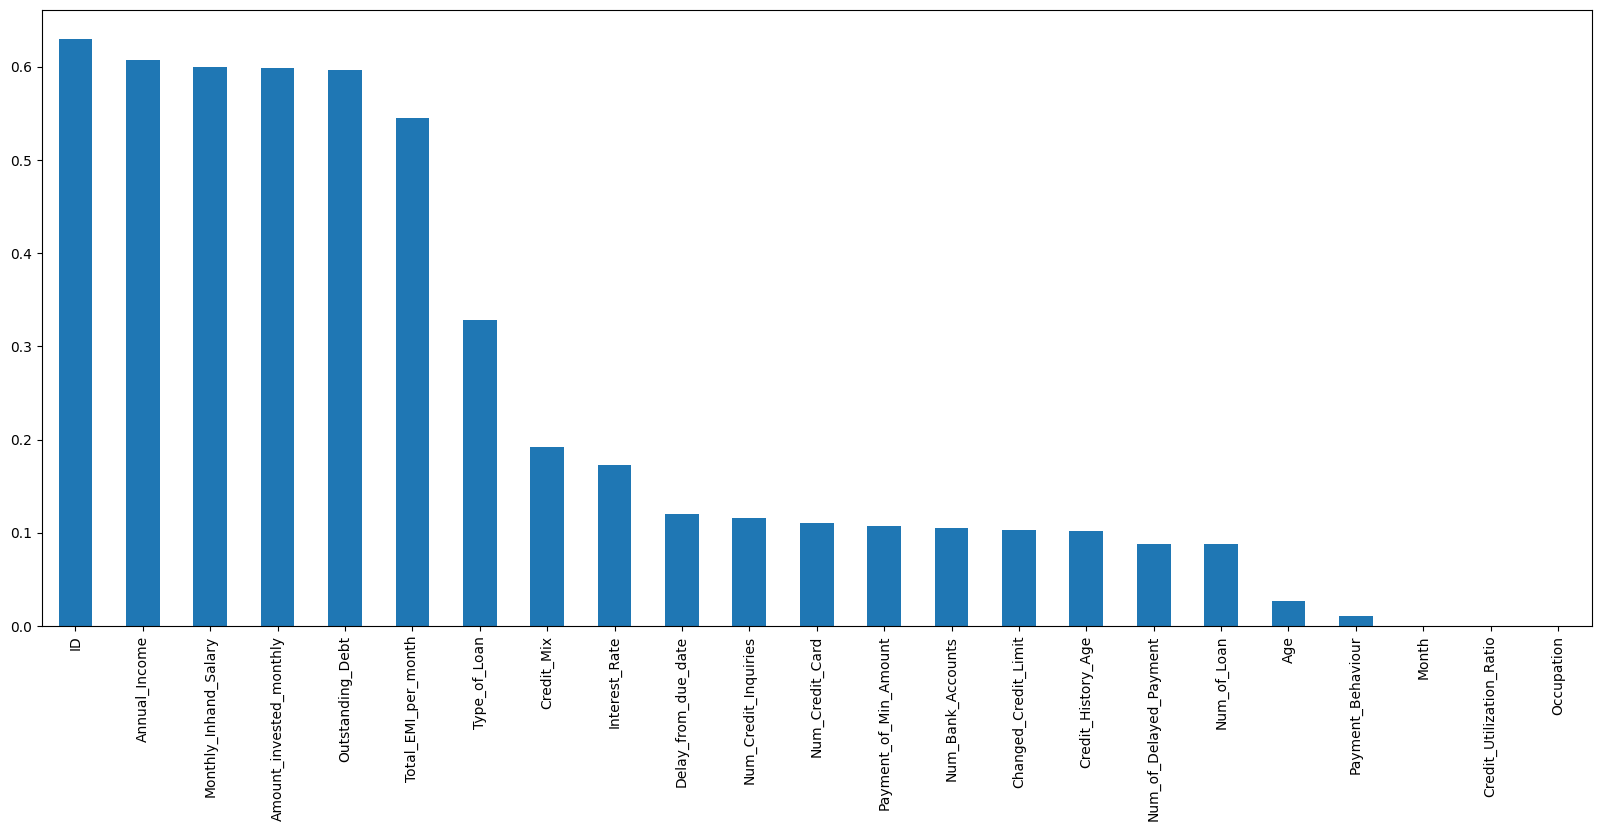

In [337]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [338]:
train.drop(['Month','Occupation','Credit_Utilization_Ratio','Payment_Behaviour'] ,axis= 1 , inplace = True)

In [339]:
train.head(5)

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,43161,40.0,97384.44,8167.370000,1.0,3.0,8.0,1.0,1410.0,20.0,...,0.52,3.0,1.0,405.45,336.0,1.0,77.284943,53.714219,847.172909,2.0
1,40663,39.0,31369.58,2607.131667,8.0,9.0,27.0,8.0,2528.0,30.0,...,19.70,6.0,0.0,4259.91,144.0,2.0,171.748418,44.990811,280.855383,2.0
2,111059,17.0,30171.86,2772.321667,6.0,7.0,30.0,9.0,5143.0,49.0,...,23.49,10.0,0.0,3406.51,123.0,2.0,205.403926,40.781489,247.322615,2.0
3,72139,22.0,13100.02,1246.668333,7.0,5.0,6.0,5.0,811.0,6.0,...,10.64,8.0,2.0,727.29,129.0,2.0,41.177132,23.005463,298.156832,2.0
4,119841,26.0,62313.54,5120.795000,6.0,2.0,18.0,4.0,520.0,27.0,...,12.82,9.0,2.0,817.64,122.0,0.0,196.679642,63.346750,152.669902,2.0


In [340]:
x = train.drop('Credit_Score',axis=1).values
y = train['Credit_Score'].values
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)
#print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [341]:
knn = KNeighborsClassifier(n_neighbors=7)

In [342]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [343]:
knn_score_train=knn.score(x_train , y_train)
knn_score_train

0.8027857142857143

In [344]:
knn_score_test=knn.score(x_test , y_test)
knn_score_test

0.6980833333333333

In [345]:
#Para balancear los datos:
SMT = SMOTE()
x_SMT, y_SMT = SMT.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.15, random_state=42)

In [346]:
knn = KNeighborsClassifier(n_neighbors=7)

In [347]:
fit_knn = knn.fit(x_train_smote, y_train_smote)


In [348]:
knn_score_train_smote=knn.score(x_train_smote , y_train_smote)
knn_score_train_smote

0.8849862639895274

In [349]:
knn_score_test_smote=knn.score(x_test_smote , y_test_smote)
knn_score_test_smote

0.8470459175677794

In [374]:
#ordinal_encoder.inverse_transform(train['Credit_Score'] )

In [397]:
results=pd.DataFrame(list(zip(x_ids,pred)),columns=['ID', 'Credit_Score'])

In [382]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            20000 non-null  int64  
 1   Credit_Score  20000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [433]:
for index,i  in results.Credit_Score:
    
    if i == 2.0: 
          print('Poor')
          results.Credit_Score[index]= 'Poor'
    if i==1.0:
         print('Standard')
         results.Credit_Score[index]='Standard'
    if i==0.0 :
         print('Good')
         results.Credit_Score[index]='Good'

ValueError: too many values to unpack (expected 2)

In [420]:
results.Credit_Score

0            Good
1        Standard
2            Poor
3             1.0
4             1.0
           ...   
19995         0.0
19996         2.0
19997         0.0
19998         2.0
19999         0.0
Name: Credit_Score, Length: 20000, dtype: object

In [398]:

rslt = ordinal_encoder.inverse_transform(results)[:,[1]]


NotFittedError: This OrdinalEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [357]:
results.to_csv('predictions.csv',index= False)